# Es 1

Di seguito i due grafici degli integrali eseguiti rispettivamente:
 - il primo con distribuzione uniforme
 - il secondo è un importance sampling con funzione $y=1-x$
 
Si nota che come ci si aspetterebbe l'importance sampling approssima meglio il valore vero dell'integrale ed è soggetto ad un errore minore.

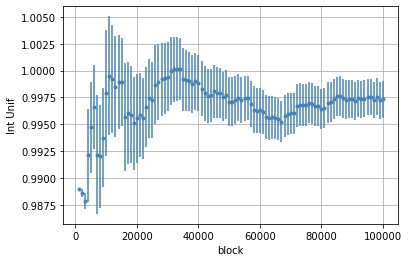

In [14]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit

file = open("es1/IntUnif.txt", "r")

for line in file:
    i=line.split()
    plt.errorbar(float(i[0]),float(i[1]), yerr=float(i[2]),marker='.', color='steelblue')

file.close()

plt.xlabel('block')
plt.ylabel('Int Unif')
plt.grid(True)
plt.show()

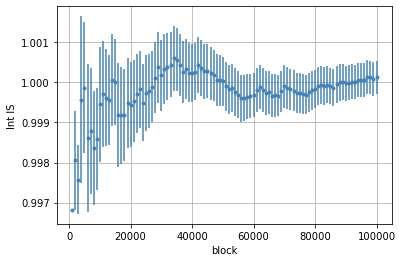

In [15]:
file = open("es1/IntIS.txt", "r")

for line in file:
    i=line.split()
    plt.errorbar(float(i[0]),float(i[1]), yerr=float(i[2]),marker='.', color='steelblue')

file.close()

plt.xlabel('block')
plt.ylabel('Int IS')
plt.grid(True)
plt.show()

# Es 2

Come ci si aspettava il risultato obbedisce alla legge:
- $f(N)=k\sqrt{N}$


Si tratta di un comportamento diffusivo poichè appunto al crescere del numero di blocchi, 100 in totale, la distanza totale dall'origine non tende a rimanere zero ma ad aumentare progressivamente. Nel caso discreto veniva effettuate una mossa alla volta lungo x, y o z avanti o indietro. Nel caso continuo di campionavano gli angoli $theta$ e $phi$.

### Passo discreto

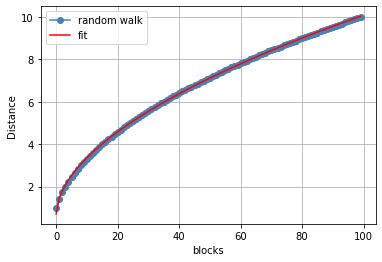

optimized parameters [a,b,c] =
[0.74753579 0.71169936 0.5493215 ]
parameters uncertainty =
[0.01284117 0.02767982 0.00325988]


In [16]:
x = np.loadtxt("es2/RWCL.txt", usecols=(0), delimiter=" ", unpack='true')

def f(z, a, b, c):
    return  a*(z**c) + b

plt.plot(x,color='steelblue',label='random walk', marker='o')
plt.legend()

p_opt, p_cov = curve_fit(f, range(len(x)), x)
y_fit = f(range(len(x)),p_opt[0],p_opt[1],p_opt[2])
plt.plot(range(len(x)),y_fit, color='red',label='fit') # plotting fitted function
plt.legend()
plt.xlabel('blocks')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

print("optimized parameters [a,b,c] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

### Passo continuo

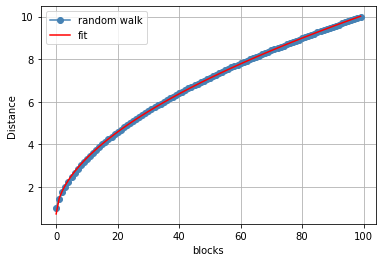

optimized parameters [a,b,c] =
[0.74218556 0.72406559 0.55006882]
parameters uncertainty =
[0.01201847 0.0259545  0.00307398]


In [18]:
x = np.loadtxt("es2/RWCont.txt", usecols=(0), delimiter=" ", unpack='true')

def f(z, a, b, c):
    return  a*(z**c) + b

plt.plot(x,color='steelblue',label='random walk', marker='o')
plt.legend()

p_opt, p_cov = curve_fit(f, range(len(x)), x)
y_fit = f(range(len(x)),p_opt[0],p_opt[1],p_opt[2])
plt.plot(range(len(x)),y_fit, color='red',label='fit') # plotting fitted function
plt.legend()
plt.xlabel('blocks')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

print("optimized parameters [a,b,c] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))